In [ ]:
pip install lassonet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import *
from lassonet import LassoNetClassifier
from lightgbm import LGBMClassifier

In [ ]:
df=pd.read_csv(r'/content/sample_data/dataindex.csv')
df1=df.loc[(df['period']=='2013J') & (df['lesson']=='BBB')]
df2=df.loc[(df['period']=='2014J') & (df['lesson']=='BBB')]

X=df1.iloc[:,803:839]
y=df1.iloc[:,839:840]
X=X.values
list=y.values.tolist()
# print(list)
volume=[]
for i in range(len(list)):
    for item in list[i]:
        volume.append(item)
y=volume

# 划分训练集,验证集,测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2)

# print(X_train.shape,X_valid.shape,X_test.shape)

# 示例特征(指标)名字
feature_names = [f'fea{i}' for i in range(1,X.shape[1] + 1)]


In [ ]:
# 加载模型
model = LassoNetClassifier(M=20, verbose=True,)
path = model.path(X_train, y_train)


n_selected = []
auc = []
lambda_ = []
feature_selected = []

# 模型训练过程
for save in path:
    model.load(save.state_dict)
    y_pred = model.predict(X_valid)
    y_score = model.predict_proba(X_valid)[:,1]
    # 选取的特征个数
    n_selected.append(save.selected.sum())
    feature_selected.append(np.array(feature_names)[save.selected.numpy()])
    #print(np.array(feature_names)[save.selected.numpy()])
    #print(accuracy_score(y_test, y_pred))
    auc.append(roc_auc_score(y_valid, y_score))
    lambda_.append(save.lambda_)

# 汇总表示
df = pd.DataFrame({'feature_selected':feature_selected,'auc':auc})
df['n_feature'] = df['feature_selected'].apply(lambda x:len(x))
df_sort = df.query("n_feature != 30").sort_values(by=['auc','n_feature'],ascending=[False,True])
df_sort

流式输出内容被截断，只能显示最后 5000 行内容。
epoch: 6
loss: 0.5288016200065613
epoch: 7
loss: 0.5288422107696533
epoch: 8
loss: 0.5288826823234558
epoch: 9
loss: 0.5289227962493896
epoch: 0
loss: 0.5289630889892578
epoch: 1
loss: 0.5290046334266663
epoch: 2
loss: 0.5290461778640747
epoch: 3
loss: 0.5290877819061279
epoch: 4
loss: 0.5291293263435364
epoch: 5
loss: 0.5291706323623657
epoch: 6
loss: 0.5292118787765503
epoch: 7
loss: 0.5292532444000244
epoch: 8
loss: 0.5292947292327881
epoch: 9
loss: 0.5293362736701965
epoch: 0
loss: 0.5293779969215393
epoch: 1
loss: 0.529420793056488
epoch: 2
loss: 0.5294634103775024
epoch: 3
loss: 0.5295061469078064
epoch: 4
loss: 0.5295488238334656
epoch: 5
loss: 0.5295915603637695
epoch: 6
loss: 0.5296341776847839
epoch: 7
loss: 0.5296770930290222
epoch: 8
loss: 0.5297197699546814
epoch: 9
loss: 0.5297624468803406
epoch: 0
loss: 0.5298050045967102
epoch: 1
loss: 0.5298487544059753
epoch: 2
loss: 0.5298923254013062
epoch: 3
loss: 0.5299357771873474
epoch: 4
loss: 0.52997

feature_selected       auc  n_feature
92   [fea1, fea3, fea4, fea5, fea6, fea7, fea8, fea...  0.632501         33
91   [fea1, fea3, fea4, fea5, fea6, fea7, fea8, fea...  0.631927         33
89   [fea1, fea2, fea3, fea4, fea5, fea6, fea7, fea...  0.631270         35
88   [fea1, fea2, fea3, fea4, fea5, fea6, fea7, fea...  0.630983         35
90   [fea1, fea2, fea3, fea4, fea5, fea6, fea7, fea...  0.630655         35
..                                                 ...       ...        ...
127                                            [fea18]  0.592470          1
128                                            [fea18]  0.592470          1
129                                            [fea18]  0.592470          1
130                                            [fea18]  0.592470          1
131                                                 []  0.500000          0

[131 rows x 3 columns]

<Axes: >

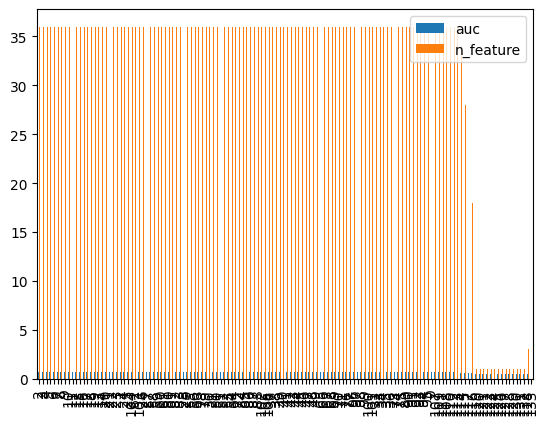

In [ ]:
df_sort.plot(kind='bar')

In [ ]:
# 选择的特征为
feature_selected = df_sort.head(1)['feature_selected'].values[0]

# 特征选择后的数据
X_train_s = pd.DataFrame(X_train,columns=feature_names)[feature_selected]
X_test_s = pd.DataFrame(X_test,columns=feature_names)[feature_selected]

print(feature_selected.__len__())

# result
28

36


28